OBJECTIVE: Predict behaviour of customer to retain them from switching other network

In [57]:
#basic import
import pandas as pd
import numpy as np

#import library for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#read the data
churn = pd.read_csv(r"E:\uc files\GULZAR\GULZAR\CHURN DATASET\Churn.csv")

In [67]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#checking for null values
churn.isnull().sum()[churn.isnull().sum()>0]*100/churn.shape[0]

Series([], dtype: float64)

In [39]:
churn.shape

(7043, 21)

In [61]:
#checking data types
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
churn.OnlineBackup=churn.OnlineBackup.replace({"No internet service":"No"})
churn.DeviceProtection=churn.DeviceProtection.replace({"No internet service":"No"})
churn.TechSupport=churn.TechSupport.replace({"No internet service":"No"})
churn.StreamingTV=churn.StreamingTV.replace({"No internet service":"No"})
churn.StreamingMovies=churn.StreamingMovies.replace({"No internet service":"No"})
churn.MultipleLines=churn.MultipleLines.replace({"No phone service":"No"})
churn.OnlineSecurity=churn.OnlineSecurity.replace({"No internet service":"No"})

In [69]:
#want to find which group of customer are mostly bad customer
import plotly.express as px

churn_yes=churn[churn["Churn"]=="Yes"]

fig=px.sunburst(churn_yes,path=["SeniorCitizen","InternetService","Contract","PaymentMethod"])
fig.show()

C:\Users\Hp\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hp\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hp\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hp\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



CONCLUSION:
    
    -customer who leave the service are
    -Citizen=Youth,Internet=Fiber optic & month_to_month & Payment=Electronic check

In [70]:
#Removing Irrelevent Variable
churn=churn.drop(["customerID"],axis=1)

In [71]:
#Converting categorical variable into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn[churn.select_dtypes(include=["object"]).columns]=churn[churn.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [72]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
churn_train,churn_test=train_test_split(churn,test_size=0.2)

churn_train_x=churn_train.iloc[:,0:-1]
churn_train_y=churn_train.iloc[:,-1]



churn_test_x=churn_train.iloc[:,0:-1]
churn_test_y=churn_train.iloc[:,-1]

In [84]:
#Model building on Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_churn=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=50,min_samples_split=75)
dt_churn.fit(churn_train_x,churn_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=50,
                       min_samples_split=75)

In [50]:
#Selecting best parameter for Decision tree
import sklearn
from sklearn.model_selection import GridSearchCV


Search_dict={"criterion":['gini',"entropy"],
             
             "min_samples_split": (100,200,270),
             "min_samples_leaf":(50,70,80),
             "max_depth":(3,4,6)
}


grid=GridSearchCV(dt_churn,param_grid=Search_dict,cv=10,verbose=1)
grid.fit(churn_train_x,churn_train_y)
grid.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 80,
 'min_samples_split': 100}

In [85]:
#Prediction on test data
pred_churn=dt_churn.predict(churn_test_x)

In [86]:
#Model performance metrics
from sklearn.metrics import confusion_matrix

tab_ctg=confusion_matrix(churn_test_y,pred_churn)
tab_ctg

array([[3705,  462],
       [ 646,  821]], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(churn_test_y,pred_churn)*100
accuracy

80.33368832090876

In [88]:
from sklearn.metrics import precision_score

precision=precision_score(churn_test_y,pred_churn)*100
precision

63.99064692127825

In [89]:
from sklearn.metrics import recall_score

recall= recall_score(churn_test_y,pred_churn)*100
recall

55.964553510565786

In [25]:
from sklearn.metrics import f1_score

f1=f1_score(churn_test_y,pred_churn)*100
f1

59.99263894000736

In [56]:
from sklearn.metrics import classification_report
print(classification_report(churn_test_y,pred_churn))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4156
           1       0.73      0.38      0.50      1478

    accuracy                           0.80      5634
   macro avg       0.77      0.66      0.69      5634
weighted avg       0.79      0.80      0.78      5634



In [19]:
# Feature Importance 
feature_imp= pd.DataFrame({"features":churn_train_x.columns,"importence":dt_churn.feature_importances_})
feature_imp.sort_values("importence",ascending=False)

,features,importence
14,Contract,0.536381
4,tenure,0.111538
8,OnlineSecurity,0.097446
17,MonthlyCharges,0.087963
7,InternetService,0.065376
18,TotalCharges,0.044935
13,StreamingMovies,0.035647
6,MultipleLines,0.008706
16,PaymentMethod,0.004289
5,PhoneService,0.003803


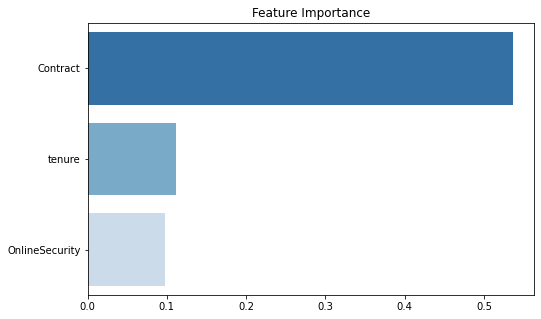

In [20]:
#Visualizing Important Features
imp=pd.Series(data=dt_churn.feature_importances_,index =dt_churn.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature Importance")
ax=sns.barplot(y=imp.head(3).index,x=imp.head(3).values,palette="Blues_r",orient="h")

In [21]:
#Graphical Representation of Decision Tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot

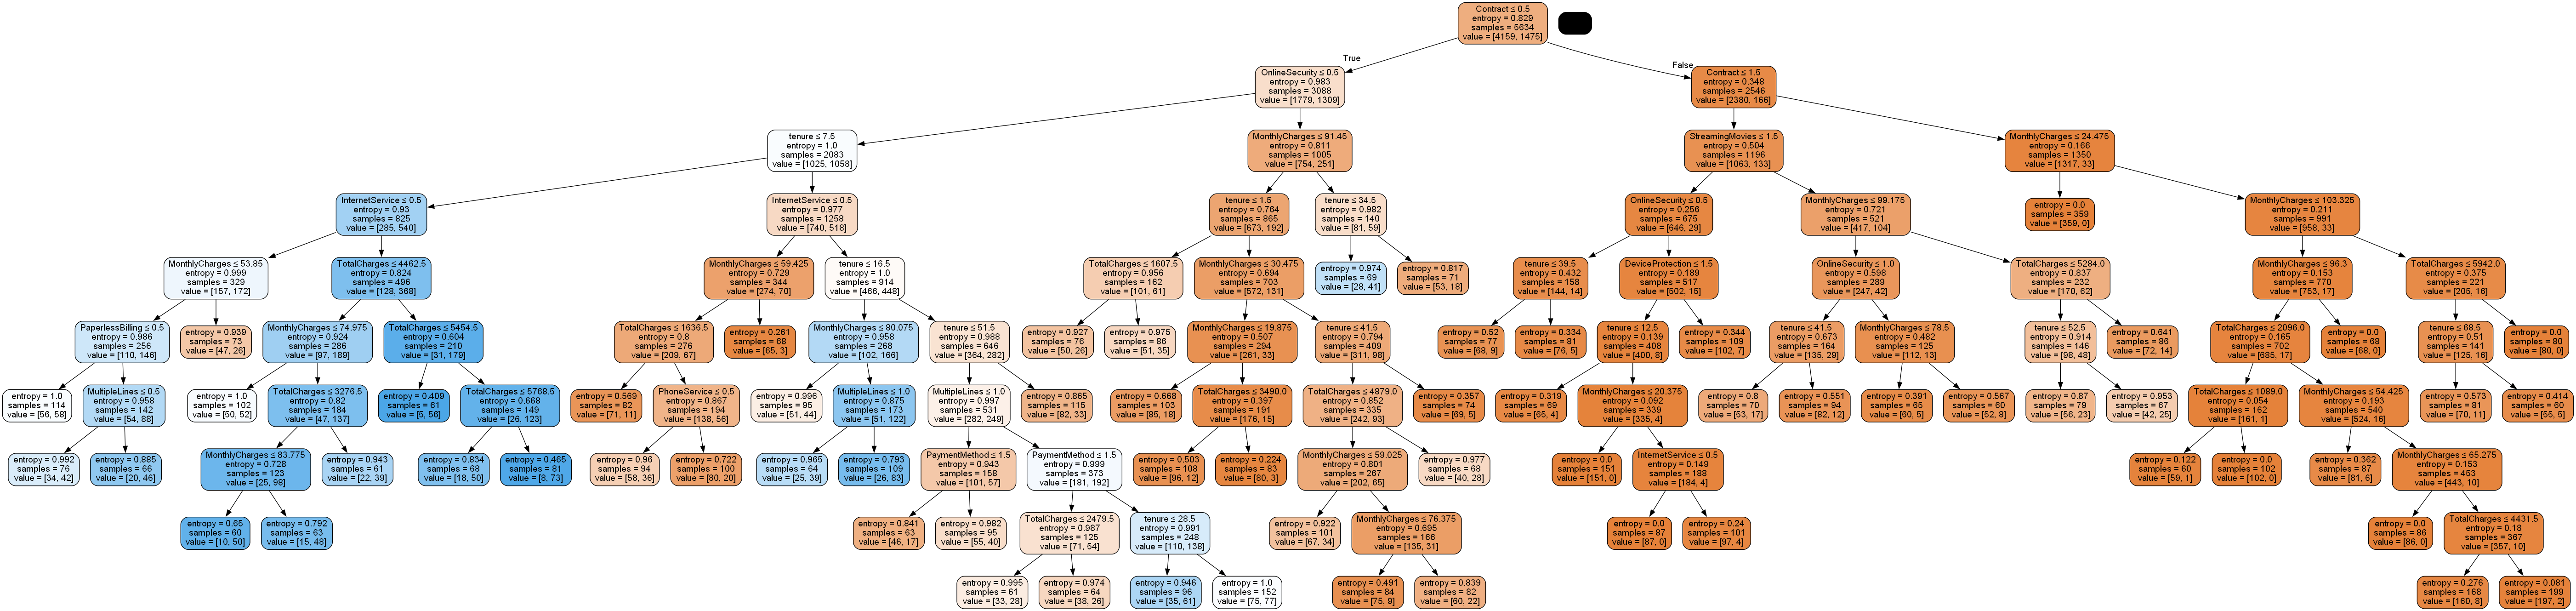

In [22]:
dot_data=StringIO()

export_graphviz(dt_churn,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,feature_names=churn_train_x.columns )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [90]:
#Saving model
import pickle
pickle.dump(dt_churn,open("DT_model_github.pkl","wb"))


In [91]:
pwd

'C:\\Users\\Hp'

# Model Building using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_churn=LogisticRegression()

log_churn.fit(churn_train_x,churn_train_y)

In [ ]:
pred_log=log_churn.predict(churn_test_x)

In [ ]:
tab_log=confusion_matrix(churn_test_y,pred_log)
tab_log

In [ ]:
print(classification_report(churn_test_y,pred_log))

# Model Building using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rcf_churn=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=9,min_samples_split=75,min_samples_leaf=50)

In [ ]:
Search_dict_rcf={"criterion":['gini',"entropy"],
             "n_estimators":(5,10,15),
             "min_samples_split": (50,75,100,150),
             "min_samples_leaf":(50,55,60),
             "max_depth":(3,5,8)
            }

grid_rcf=GridSearchCV(rcf_churn,param_grid=Search_dict_rcf)
grid_rcf.fit(churn_train_x,churn_train_y)

grid_rcf.best_params_

In [ ]:
rcf_churn.fit(churn_train_x,churn_train_y)

In [ ]:
pred_rcf=rcf_churn.predict(churn_test_x)

In [ ]:
tab_rcf=confusion_matrix(churn_test_y,pred_rcf)
tab_rcf

In [ ]:
print(classification_report(churn_test_y,pred_log))

# Model Building using  Gradient Boosting

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_parameters={"n_estimators":[2,4,6],
                 "max_depth":   [2,3,5],
                 "learning_rate":[0.8,0.6],
                 "min_samples_leaf":[50,100,125],
                 "min_samples_split":[50,75,100,125]}

In [ ]:
model=GradientBoostingClassifier(criterion='mse',random_state=10)

gscv_GBM=GridSearchCV(estimator=model,
                     param_grid=model_parameters,
                     cv=5,
                     verbose=1,
                     n_jobs=-1,
                     scoring="accuracy")
gscv_GBM.fit(churn_train_x,churn_train_y)

In [ ]:
print("the best parameter are :",gscv_GBM.best_params_)

In [ ]:
final_mod_GBM=GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(churn_train_x,churn_train_y)

In [ ]:
pred_churn=final_mod_GBM.predict(churn_test_x)
print(classification_report(churn_train_y,pred_churn))

# Model Building using Xgboost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [ ]:
model_parameters1={"n_estimators":[2,4,6],
                 "max_depth":   [2,3,5],
                 "learning_rate":[0.8,0.6],
                 "min_samples_leaf":[100,200,270],
                 "min_samples_split":[50,70,80]}

In [ ]:
model1=XGBClassifier(reg_lambda=0)
gscv=GridSearchCV(estimator=model1,
                     param_grid=model_parameters1,
                     cv=5,
                     verbose=1,
                     n_jobs=-1,
                     scoring="accuracy")
gscv.fit(churn_train_x,churn_train_y)

In [ ]:
print("the best parameter are :",gscv.best_params_)

In [ ]:
final_mod=XGBClassifier(**gscv.best_params_)
final_mod.fit(churn_train_x,churn_train_y)

In [ ]:
pred_churn=final_mod.predict(churn_test_x)
print(classification_report(churn_train_y,pred_churn))